## Find the awesome original post here: [Decision Tree In Python](https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93)

## Question 1 in my mind

from the original post:

> Since income is a continuous variable, we set an arbitrary value.

Will this arbitrary setting anyhow affect the final splitting features' order, like income was originally supposed to be the top criteria, but due to we arbitrarily set a bad value cause it goes to the 2nd criteria, is this possible?

## Complement 1: decision tree for regression problems (when the dependent variable is continuous)

Regression trees are used when the dependent variable is continuous.
For regression trees, the value of terminal nodes is the mean of the observations falling in that region. Therefore, if an unseen data point falls in that region, we predict using the mean value.

## Complement 2: some decision tree historical knowledges

- ID3 (Iterative Dichotomiser 3)

- C4.5 developed ID3

- C5.0

- CART: it is very similar to C4.5, but with regression support, and it doesn't calculate the rules set. It selects the feature which cause the most information gain and threshold to construct the tree.

- sklearn implements an optimized CART variant.

## sklearn.tree.DecisionTreeClassifier example

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data

import numpy as np
import pandas as pd

In [16]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In the proceeding section, we will attempt to build a decision tree classifier to determine the kind of flower given its dimensions.

Although decision tree can handle categorical data, we will still encode the targets in terms of digits (i.e. setosa = 0, versicolor = 1, virginica = 2) in order to create a confusion matrix at a later point. Fortunately, the `pandas` lib provides a method for this very purpose.

In [17]:
y = pd.get_dummies(y)
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


We’ll want to evaluate the performance of our model. Therefore, we set a quarter of the data aside for testing.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We can view the actual decision tree produced by our model by running the following block of code.

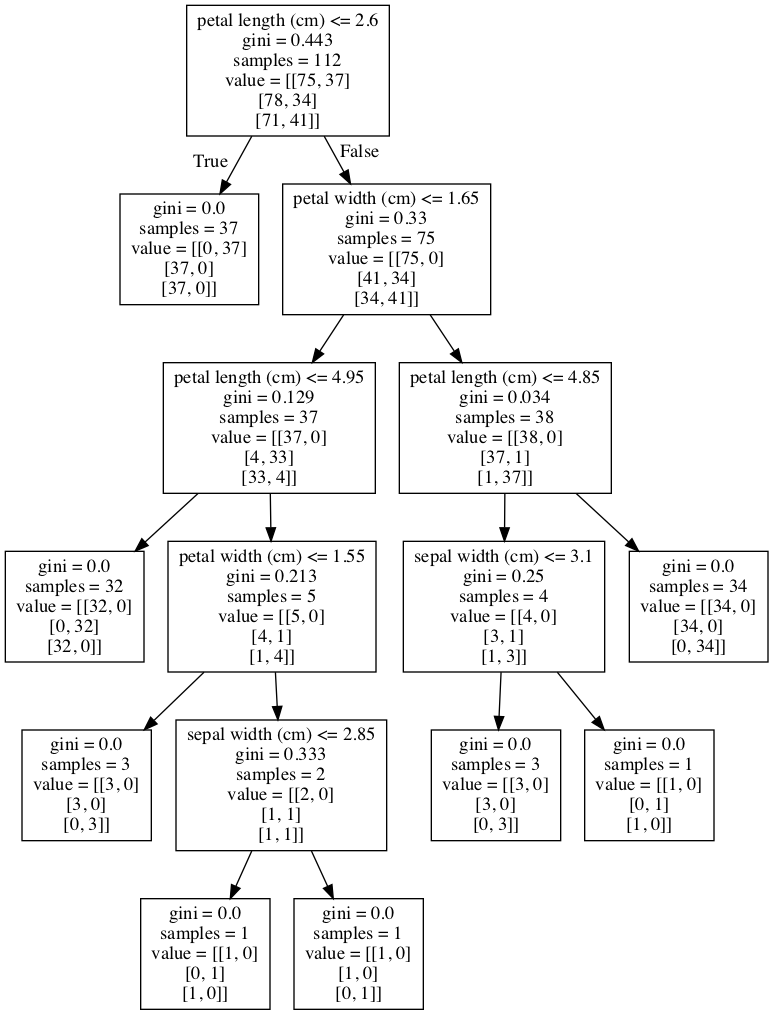

In [19]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)

(graph,) = graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Let’s see how our decision tree does when its presented with test data.

In [20]:
y_pred = dt.predict(X_test)

If this were a regression problem, we’d use some kind of loss function such as Mean Square Error (MSE). However, since this is a classification problem, we make use of a confusion matrix to guage the accuracy of our model. The confusion matrix is best explained with the use of an example.

FYI: What is the Confusion Matrix?

- A binary classifier predicts all data instances of a test dataset as either positive or negative. This produces four outcomes:
    * True positive(TP) — Correct positive prediction
    * False-positive(FP, type 1 error) — Incorrect positive prediction
    * True negative(TN) — Correct negative prediction
    * False-negative(FN, type 2 error) — Incorrect negative prediction
    
- It helps in calculating various measures including:
    * error rate: $(FP + FN)/(P + N)$
    * specificity: $(TN / N)$
    * accuracy: $(TP + TN)/(P + N)$
    * sensitivity: $(TP / P)$
    * precision: $(TP / (TP + FP))$
    
- A confusion matrix is essentially used to evaluate the performance of a machine learning model;

That being said, the numbers on the diagonal of the confusion matrix correspond to correct predictions. When there are more than two potential outcomes, we simply extend the number of columns and rows in the confusion matrix.

In [21]:
species = np.array(y_test).argmax(axis=1)

predictions = np.array(y_pred).argmax(axis=1)

confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

As we can see, our decision tree classifier correctly classified 37/38 plants.

## Random forest

Find the awesome post here: [Random Forest In Python](https://towardsdatascience.com/random-forest-in-python-154d78aad254)

## In a nutshell

Like decision trees, random forest can be applied to both regression and classification problems.

As is implied by the names "Tree" and "Forest", a Random Forest is essentially a collection of Decision Trees. A decision tree is built on an __entire dataset, using all the features/variables of interest__, whereas a random forest __randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results__. After a large number of trees are built using this method, each tree __votes__ or chooses the class, and the class receiving the most votes by a simple majority is the "winner" or predicted class. There are of course some more detailed differences, but this is the main conceptual difference. (referred from here: [Difference between Random Forests and Decision tree](https://stats.stackexchange.com/a/285835/229537))

The portion of samples that were left out during the construction of each decision tree in the forest are referred to as the Out-Of-Bag (OOB) dataset. As we will see later, the model will automatically evaluate its own performance by running each of the samples in the OOB dataset through the forest.

Also note that there are laws which demand that the decisions made by models used in issuing loans or insurance be explainable. The latter is known as model interpretability and is one of the reasons why we see random forest models being used heavily in industry.